In [5]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

dataset_path = 'D:/PetImages'

train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'validation')

# Загрузка данных
train_dataset = image_dataset_from_directory(
    train_dir,  # Путь к папке с изображениями для тренировки
    image_size=(150, 150),  # Размер изображений
    batch_size=32,  # Размер батча
    label_mode='binary',  # Бинарные метки для классификации (кошки или собаки)
    validation_split=0.2,  # Разделение на тренировочную и валидационную выборки
    subset='training',  # Для тренировочной выборки
    seed=123  # Для воспроизводимости
)

val_dataset = image_dataset_from_directory(
    val_dir,  # Путь к папке с изображениями для тренировки
    image_size=(150, 150),  # Размер изображений
    batch_size=32,  # Размер батча
    label_mode='binary',  # Бинарные метки для классификации (кошки или собаки)
    validation_split=0.2,  # Разделение на тренировочную и валидационную выборки
    subset='validation',  # Для валидационной выборки
    seed=123  # Для воспроизводимости
)

# Предобработка данных (например, нормализация пикселей)
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Настройка предсказаний
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 1000 files belonging to 2 classes.
Using 200 files for validation.


In [16]:
from tensorflow.keras import layers, models

# model = tf.keras.Sequential([
#     tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),  # Масштабирование пикселей
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(64, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(128, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(1)  # Выходной слой для бинарной классификации
# ])

# # Компиляция модели
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# # Обучение модели
# history = model.fit(train_dataset, epochs=50, validation_data=val_dataset)

# Создание модели
model = models.Sequential()

# Сверточные слои
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Полносвязные слои для классификации
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))

# Выходной слой
model.add(layers.Dense(1, activation='sigmoid'))  # Для бинарной классификации (кошки/собаки)

# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 64)      

In [17]:
history = model.fit(
    train_dataset,
    epochs=50,  # Количество эпох
    validation_data=val_dataset
)


Epoch 1/50
50/50 [==============================] - 1s 14ms/step - loss: 0.6965 - accuracy: 0.4812 - val_loss: 0.6919 - val_accuracy: 0.5650
Epoch 2/50
50/50 [==============================] - 1s 10ms/step - loss: 0.6918 - accuracy: 0.5106 - val_loss: 0.6892 - val_accuracy: 0.6250
Epoch 3/50
50/50 [==============================] - 0s 10ms/step - loss: 0.6901 - accuracy: 0.5119 - val_loss: 0.6871 - val_accuracy: 0.5650
Epoch 4/50
50/50 [==============================] - 0s 10ms/step - loss: 0.6749 - accuracy: 0.5869 - val_loss: 0.6712 - val_accuracy: 0.5900
Epoch 5/50
50/50 [==============================] - 0s 10ms/step - loss: 0.6411 - accuracy: 0.6363 - val_loss: 0.6455 - val_accuracy: 0.6450
Epoch 6/50
50/50 [==============================] - 0s 10ms/step - loss: 0.6157 - accuracy: 0.6575 - val_loss: 0.6971 - val_accuracy: 0.6250
Epoch 7/50
50/50 [==============================] - 1s 10ms/step - loss: 0.5584 - accuracy: 0.7163 - val_loss: 0.7320 - val_accuracy: 0.6350
Epoch 8/50
50

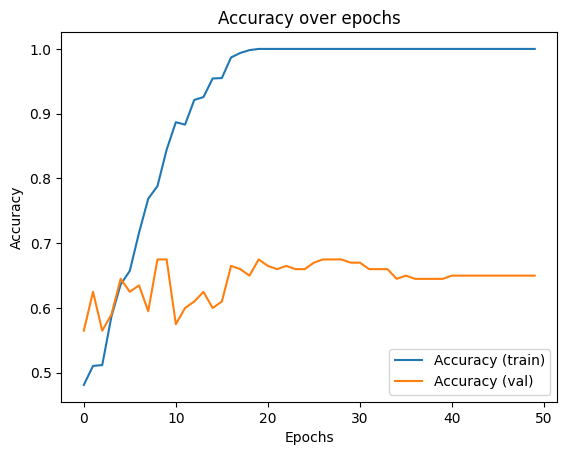

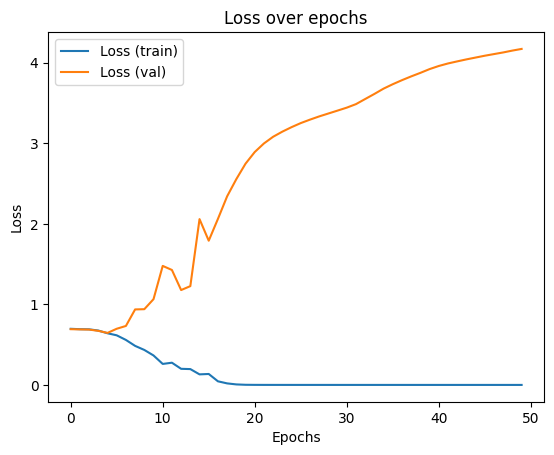

KeyError: 'mse'

In [22]:
import matplotlib.pyplot as plt

# График точности
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label='Accuracy (val)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

# График функции потерь
plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (val)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()


In [26]:
# Загрузка нового изображения
from tensorflow.keras.preprocessing import image

img_path = 'main.jpg'  # Путь к новому изображению
img = image.load_img(img_path, target_size=(150, 150))  # Преобразование изображения
img_array = image.img_to_array(img)  # Преобразование в массив
img_array = tf.expand_dims(img_array, 0)  # Добавление батча

# Предсказание
predictions = model.predict(img_array)

# Вывод результата
if predictions[0] > 0.5:
    print("Это собака!")
else:
    print("Это кошка!")


Это собака!


---

In [27]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Параметры
image_size = (150, 150)
batch_size = 32
epochs = 70

# Директории с данными
train_dir = "D:/PetImages/train"
val_dir = "D:/PetImages/validation"

# Генератор данных
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [28]:
# Загрузка VGG16 без верхнего классификатора
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Замораживаем сверточные слои
base_model.trainable = False

# Проверка архитектуры
base_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [29]:
# Создание классификатора
model = Sequential([
    base_model,
    Flatten(),  # Преобразуем выходы VGG16 в вектор
    Dense(256, activation='relu'),
    Dropout(0.5),  # Снижаем переобучение
    Dense(1, activation='sigmoid')  # Для бинарной классификации
])

# Компиляция модели
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_18 (Dense)            (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [30]:
# Обучение модели
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


Epoch 1/70
50/50 [==============================] - 6s 96ms/step - loss: 0.5138 - accuracy: 0.7356 - val_loss: 0.3194 - val_accuracy: 0.8725
Epoch 2/70
50/50 [==============================] - 2s 43ms/step - loss: 0.3160 - accuracy: 0.8656 - val_loss: 0.2886 - val_accuracy: 0.8775
Epoch 3/70
50/50 [==============================] - 2s 45ms/step - loss: 0.2578 - accuracy: 0.8944 - val_loss: 0.2495 - val_accuracy: 0.9075
Epoch 4/70
50/50 [==============================] - 2s 45ms/step - loss: 0.2170 - accuracy: 0.9175 - val_loss: 0.2441 - val_accuracy: 0.9125
Epoch 5/70
50/50 [==============================] - 2s 46ms/step - loss: 0.1811 - accuracy: 0.9381 - val_loss: 0.2374 - val_accuracy: 0.9175
Epoch 6/70
50/50 [==============================] - 2s 43ms/step - loss: 0.1672 - accuracy: 0.9444 - val_loss: 0.2468 - val_accuracy: 0.8975
Epoch 7/70
50/50 [==============================] - 2s 43ms/step - loss: 0.1442 - accuracy: 0.9481 - val_loss: 0.2275 - val_accuracy: 0.9075
Epoch 8/70
50

In [ ]:
# Построение графиков
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    # Точность
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Потери
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

plot_history(history)


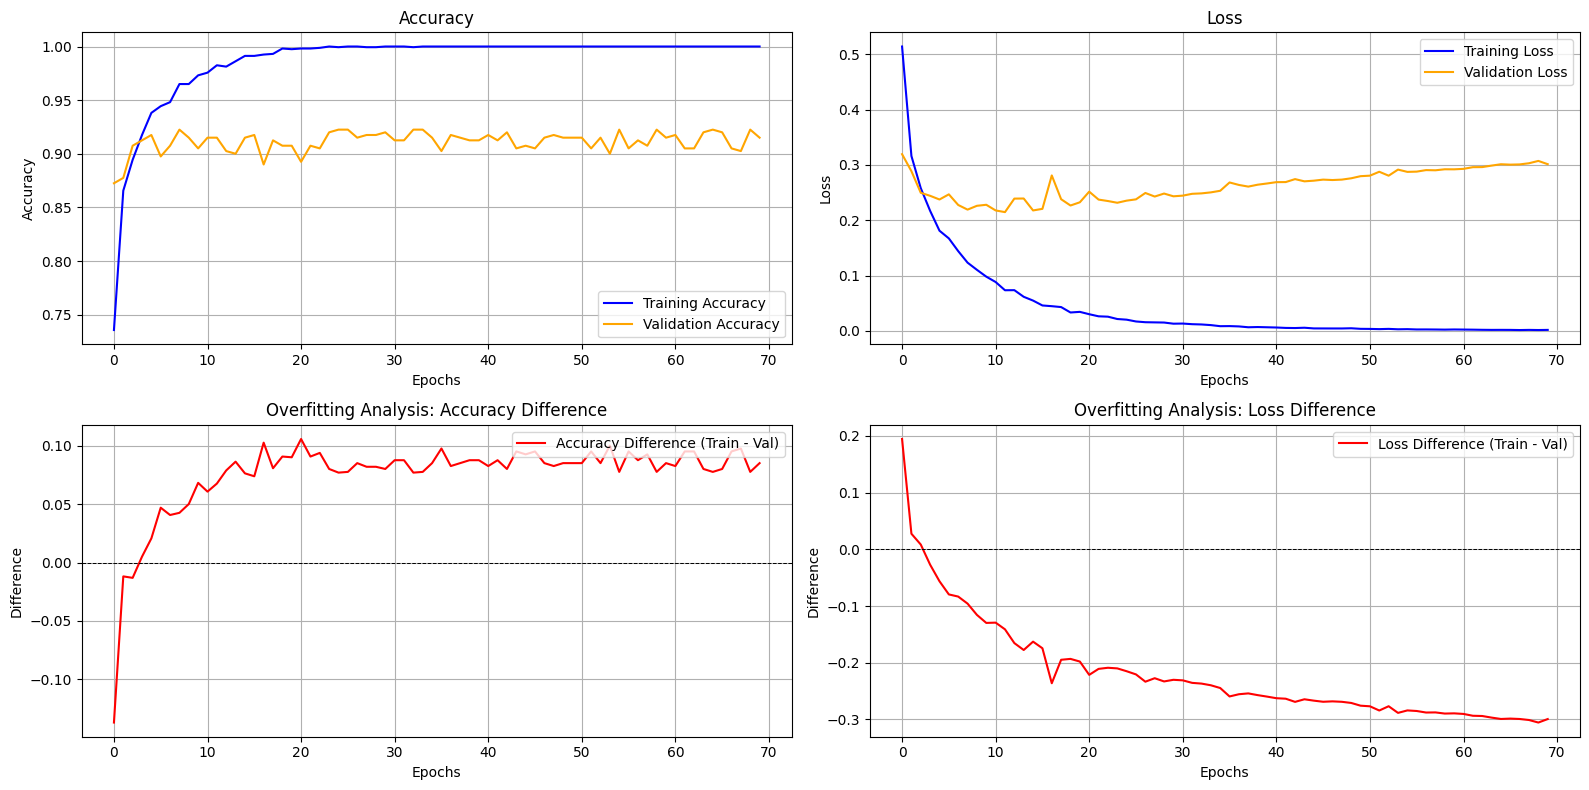

<Figure size 640x480 with 0 Axes>

In [40]:
def plot_with_overfitting_analysis(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(16, 8))

    # График точности
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)

    # График функции потерь
    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss', color='blue')
    plt.plot(epochs_range, val_loss, label='Validation Loss', color='orange')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)

    # Разница в точности
    plt.subplot(2, 2, 3)
    acc_diff = [train - val for train, val in zip(acc, val_acc)]
    plt.plot(epochs_range, acc_diff, label='Accuracy Difference (Train - Val)', color='red')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
    plt.title('Overfitting Analysis: Accuracy Difference')
    plt.xlabel('Epochs')
    plt.ylabel('Difference')
    plt.legend(loc='upper right')
    plt.grid(True)

    # Разница в функции потерь
    plt.subplot(2, 2, 4)
    loss_diff = [train - val for train, val in zip(loss, val_loss)]
    plt.plot(epochs_range, loss_diff, label='Loss Difference (Train - Val)', color='red')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
    plt.title('Overfitting Analysis: Loss Difference')
    plt.xlabel('Epochs')
    plt.ylabel('Difference')
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
    plt.savefig('saved_figure.png')
    
plot_with_overfitting_analysis(history)

Введите путь к изображению:  CatDogImg/main.jpg


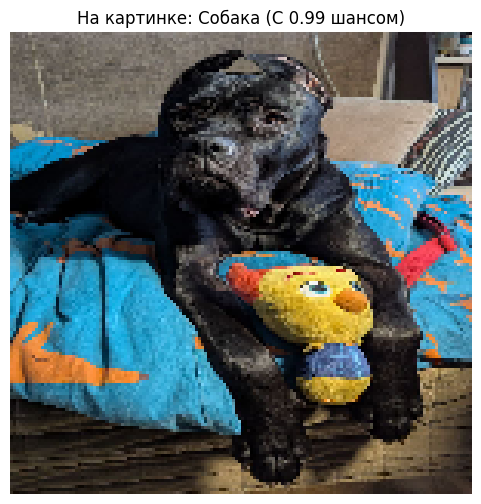

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_and_show_image(model, image_size=(150, 150)):

    # Запрос пути к изображению
    img_path = input("Введите путь к изображению: ").strip()
    
    try:
        # Загрузка изображения
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img) / 255.0  # Преобразуем в массив и нормализуем
        img_array = np.expand_dims(img_array, axis=0)  # Добавляем ось для батча
        
        # Предсказание
        prediction = model.predict(img_array)[0][0]
        predicted_class = "Собака" if prediction > 0.5 else "Кот"
        confidence = prediction if prediction > 0.5 else 1 - prediction
        
        # Вывод изображения и предсказания
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"На картинке: {predicted_class} (С {confidence:.2f} шансом)")
        plt.show()

    except Exception as e:
        print(f"Ошибка при обработке изображения: {e}")

# Пример использования
predict_and_show_image(model)
